In [13]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import thinkbayes2
import thinkplot

import statsmodels.formula.api as smf


In [14]:
df = pd.read_csv('heri17.csv', skiprows=2, index_col='year')
df[df.columns] /= 10
df.head()

,noneall,fatherall,motherall,attendedall,nonemen,fathermen,mothermen,attendedmen,nonewomen,fatherwomen,motherwomen,attendedwomen,bornagain,evangelical
year,,,,,,,,,,,,,,
1966,NaN,NaN,NaN,66.1,NaN,NaN,NaN,59.0,NaN,NaN,NaN,74.0,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,91.7,NaN,NaN,NaN,90.0,NaN,NaN,NaN,93.7,NaN,NaN
1969,13.6,NaN,NaN,91.0,15.7,NaN,NaN,89.2,2.3,NaN,NaN,93.0,NaN,NaN
1970,10.7,NaN,3.1,89.0,11.9,NaN,2.8,87.4,9.1,NaN,3.3,90.9,NaN,NaN


In [20]:
df['time'] = df.index - 1966
df['time2'] = df.time**2

In [21]:
def MakeErrorModel(df, y, formula, n=100):
    """Makes a model that captures sample error and residual error.

    df: DataFrame
    y: Series
    formula: string representation of the regression model
    n:     number of simulations to run

    returns: (fittedvalues, sample_error, total_error)
    """
    # make the best fit
    df['y'] = y
    results = smf.ols(formula, data=df).fit()
    fittedvalues = results.fittedvalues
    resid = results.resid    

    # permute residuals and generate hypothetical fits
    fits = []
    for i in range(n):
        df['y'] = fittedvalues + np.random.permutation(results.resid)
        fake_results = smf.ols(formula, data=df).fit()
        fits.append(fake_results.fittedvalues)

    # compute the variance of the fits
    fits = np.array(fits)
    sample_var = fits.var(axis=0)
    
    # add sample_var and the variance of the residuals
    total_var = sample_var + resid.var()

    # standard errors are square roots of the variances
    return fittedvalues, np.sqrt(sample_var), np.sqrt(total_var)

In [22]:
def FillBetween(fittedvalues, stderr, **options):
    """Fills in the 95% confidence interval.
    
    fittedvalues: series
    stderr: standard error
    """
    low = fittedvalues - 2 * stderr
    high = fittedvalues + 2 * stderr
    thinkplot.FillBetween(fittedvalues.index, low, high, **options)

In [67]:
def PlotModel(y, fittedvalues, sample_error, total_error, **options):
    """Plots confidence intervals and the actual data
    """
    FillBetween(fittedvalues, total_error, color='0.9')
    FillBetween(fittedvalues, sample_error, color='0.7')
    thinkplot.Plot(fittedvalues, color='0.5')
    thinkplot.Plot(y, **options)

In [68]:
def Plot(df, y, formula, **options):

    fittedvalues, sample_error, total_error = MakeErrorModel(df, y, formula)
    PlotModel(y, fittedvalues, sample_error, total_error, **options)

    thinkplot.Config(xlim=[1965, 2017])

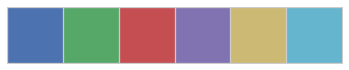

In [90]:

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=1.3)

current_palette = sns.color_palette()
sns.palplot(current_palette)
BLUE, GREEN, RED, PURPLE, YELLOW, SKY = current_palette

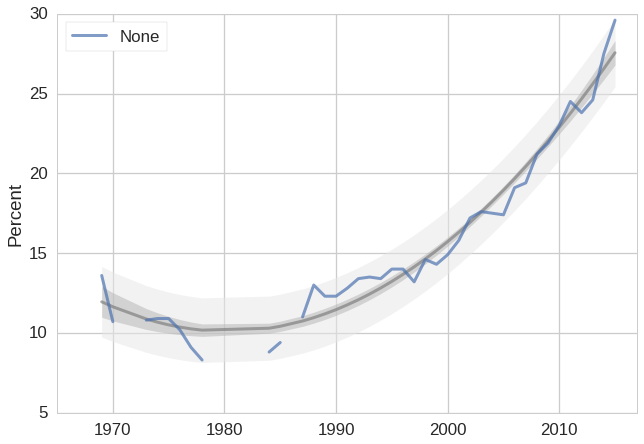

In [99]:
formula = 'y ~ time + time2'
y = df.noneall
Plot(df, y, formula, color=BLUE, label='None')
thinkplot.Config(ylabel='Percent', loc='upper left')

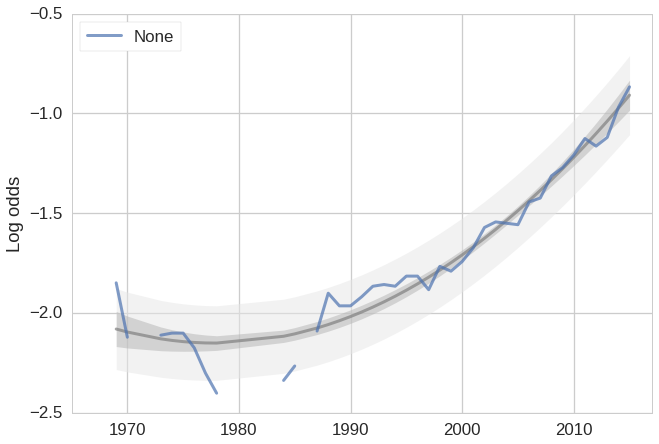

In [100]:
ps = df.noneall / 100
odds = ps / (1-ps)
log_odds = np.log(odds)
log_odds
Plot(df, log_odds, formula, color=BLUE, label='None')
thinkplot.Config(ylabel='Log odds')

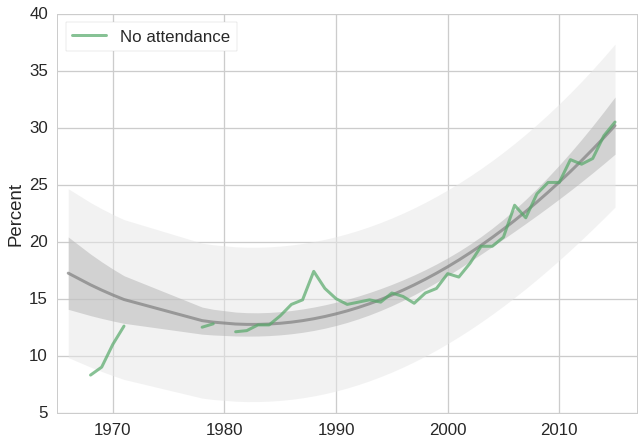

In [102]:
attend = 100-df.attendedall
Plot(df, attend, formula, color=GREEN, label='No attendance')
thinkplot.Config(ylabel='Percent')

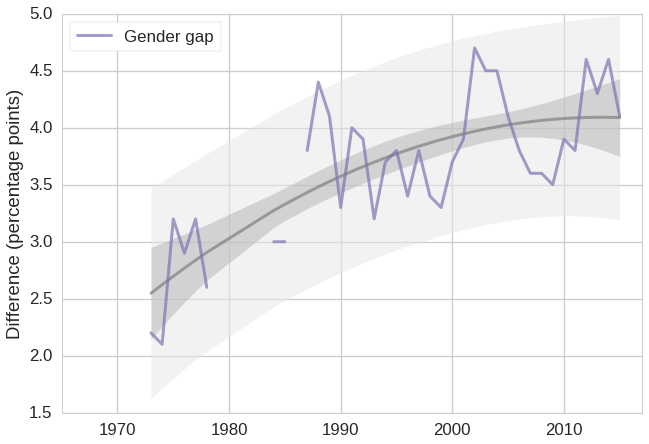

In [104]:
diff = df.nonemen - df.nonewomen
diff = diff.loc[1973:]
Plot(df, diff, formula, color=PURPLE, label='Gender gap')
thinkplot.Config(ylabel='Difference (percentage points)')

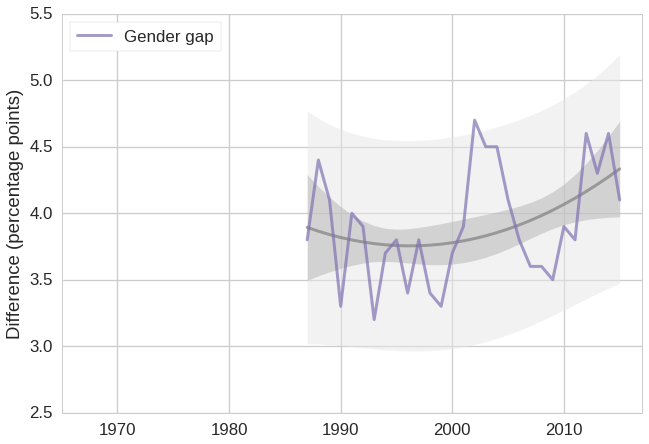

In [105]:
diff = df.nonemen - df.nonewomen
diff = diff.loc[1986:]
Plot(df, diff, formula, color=PURPLE, label='Gender gap')
thinkplot.Config(ylabel='Difference (percentage points)')

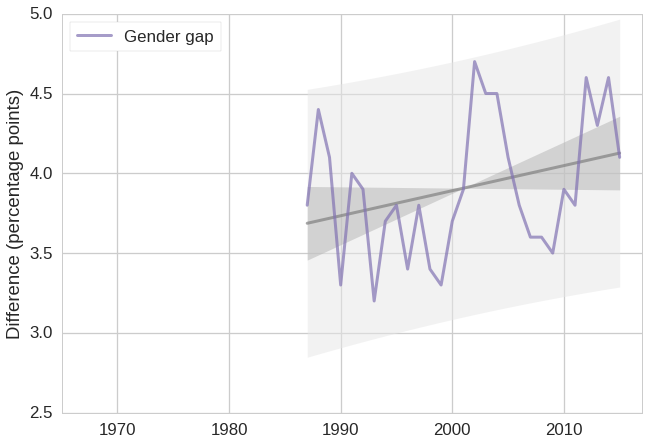

In [106]:
diff = df.nonemen - df.nonewomen
diff = diff.loc[1986:]
Plot(df, diff, 'y ~ time', color=PURPLE, label='Gender gap')
thinkplot.Config(ylabel='Difference (percentage points)')